In [172]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [173]:
dir_path = '../datasets/cars/'



dataset_name = 'cars'

file = 'New_cars_preprocessed'

os.listdir(dir_path)

['New_cars_preprocessed.csv', 'New_cars_cleaned.csv']

In [174]:


house = pd.read_csv(dir_path + file +'.csv')
house.head()

,Unnamed: 0,MSRP,EPA Fuel Economy Est - City (MPG),Engine,Drivetrain,Passenger Capacity,Passenger Doors,Wheelbase (in),SAE Net Torque @ RPM,Fuel System,...,Drivetrain Years,Turning Diameter - Curb to Curb (ft),Front Wheel Material,Roadside Assistance Miles/km,Manufacturer,Model year,Category,Front tire width,Front tire aspect ratio,Front tire rim size
0,0,40600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
1,1,45500.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
2,2,43600.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,15,45.0,20.0
3,3,37400.0,22.0,10,2,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0
4,4,42600.0,21.0,10,1,5,4,108.3,280.0,0,...,6.0,39.0,1,50000.0,0,2019,2,12,55.0,19.0


In [175]:
house.columns

Index(['Unnamed: 0', 'MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine',
       'Drivetrain', 'Passenger Capacity', 'Passenger Doors', 'Wheelbase (in)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Basic Miles/km', 'Basic Years', 'Corrosion Miles/km',
       'Corrosion Years', 'Drivetrain Miles/km', 'Drivetrain Years',
       'Turning Diameter - Curb to Curb (ft)', 'Front Wheel Material',
       'Roadside Assistance Miles/km', 'Manufacturer', 'Model year',
       'Category', 'Front tire width', 'Front tire aspect ratio',
       'Front tire rim size'],
      dtype='object')

In [176]:
house.drop('Unnamed: 0', inplace=True, axis=1)


In [177]:
house_copy = house.copy()

In [178]:
house.columns


Index(['MSRP', 'EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Wheelbase (in)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Basic Miles/km', 'Basic Years', 'Corrosion Miles/km',
       'Corrosion Years', 'Drivetrain Miles/km', 'Drivetrain Years',
       'Turning Diameter - Curb to Curb (ft)', 'Front Wheel Material',
       'Roadside Assistance Miles/km', 'Manufacturer', 'Model year',
       'Category', 'Front tire width', 'Front tire aspect ratio',
       'Front tire rim size'],
      dtype='object')

In [179]:
# with sns.plotting_context("notebook",font_scale=2.5):
#     g = sns.pairplot(house[['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
#        'weathersit', 'temp', 'atemp', 'hum', 'windspeed']], 
#                  hue='weekday', palette='tab20',size=6)
# g.set(xticklabels=[]);

<AxesSubplot:title={'center':'Pearson Correlation of features'}>

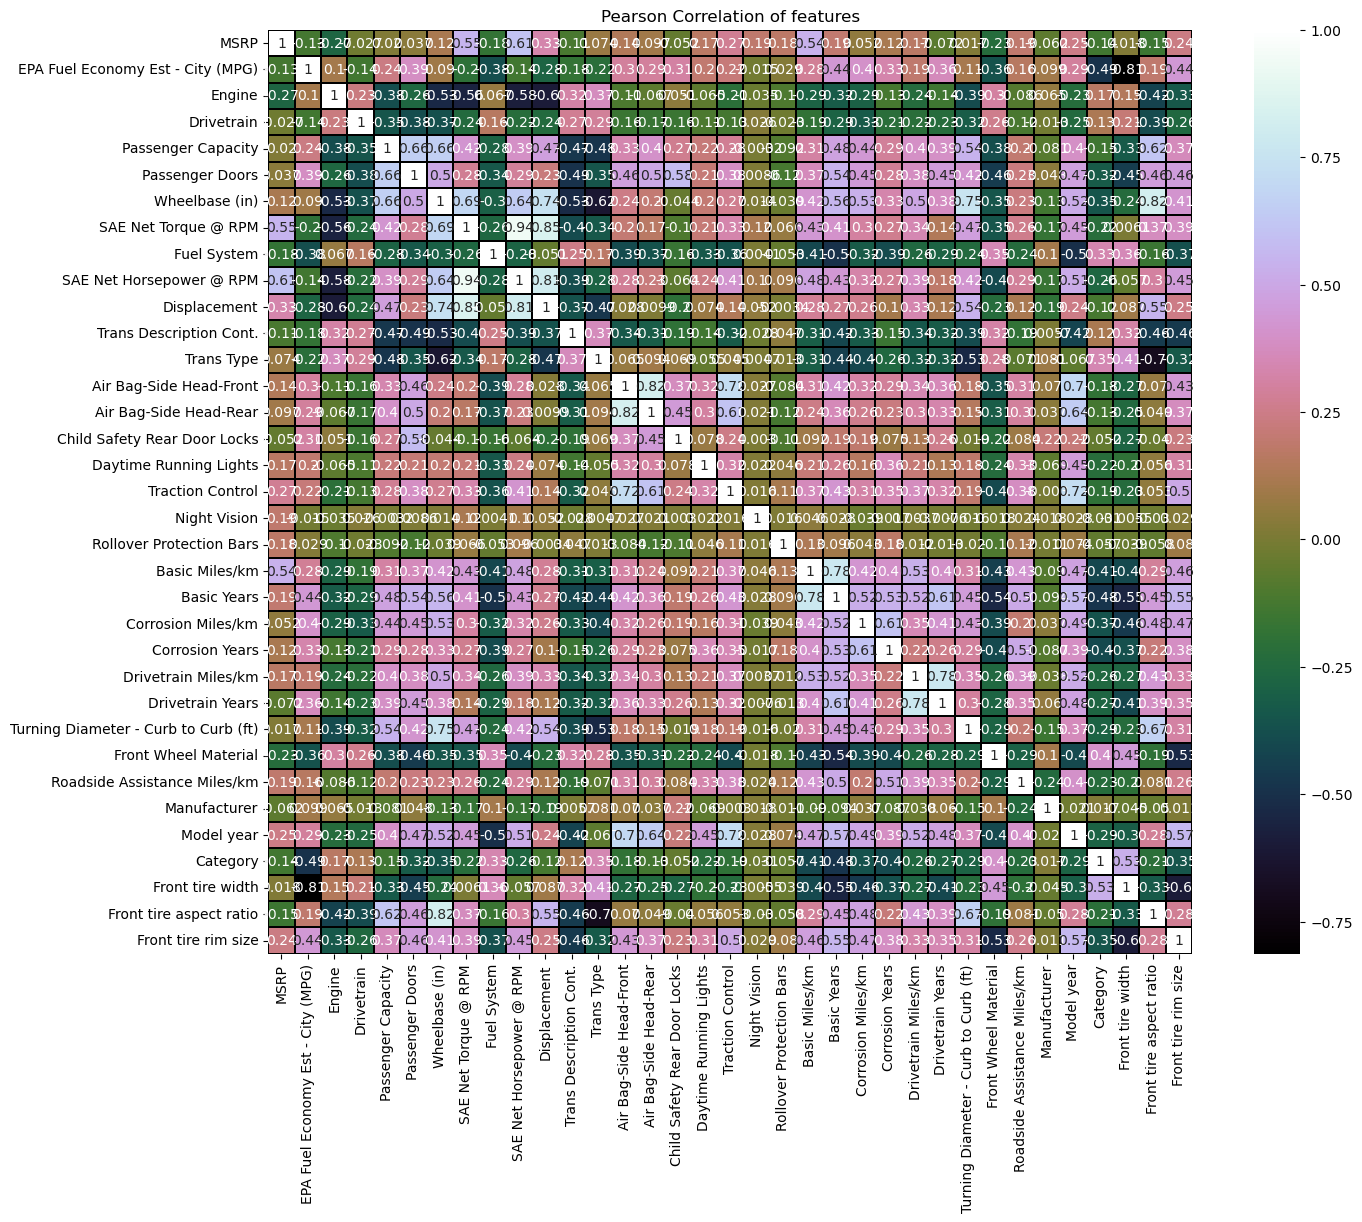

In [180]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in house.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = house.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = house[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [181]:



# target_column = 'latestPrice'
target_column = 'MSRP'

# First extract the target variable which is our House prices
Y = house_copy[target_column]
# Drop price from the house dataframe and create a matrix out of the house data
house_copy = house_copy.drop([target_column], axis=1)
X = house_copy.values
# Store the column/feature names into a list "colnames"
colnames = house_copy.columns


In [182]:
Y

0        40600.0
1        45500.0
2        43600.0
3        37400.0
4        42600.0
          ...   
32257    45700.0
32258    41200.0
32259    44850.0
32260    41000.0
32261    44650.0
Name: MSRP, Length: 32262, dtype: float64

In [183]:
colnames

Index(['EPA Fuel Economy Est - City (MPG)', 'Engine', 'Drivetrain',
       'Passenger Capacity', 'Passenger Doors', 'Wheelbase (in)',
       'SAE Net Torque @ RPM', 'Fuel System', 'SAE Net Horsepower @ RPM',
       'Displacement', 'Trans Description Cont.', 'Trans Type',
       'Air Bag-Side Head-Front', 'Air Bag-Side Head-Rear',
       'Child Safety Rear Door Locks', 'Daytime Running Lights',
       'Traction Control', 'Night Vision', 'Rollover Protection Bars',
       'Basic Miles/km', 'Basic Years', 'Corrosion Miles/km',
       'Corrosion Years', 'Drivetrain Miles/km', 'Drivetrain Years',
       'Turning Diameter - Curb to Curb (ft)', 'Front Wheel Material',
       'Roadside Assistance Miles/km', 'Manufacturer', 'Model year',
       'Category', 'Front tire width', 'Front tire aspect ratio',
       'Front tire rim size'],
      dtype='object')

In [184]:
colnames = house_copy.columns


In [185]:
ranks = {}
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [186]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50
building tree 15 of 50

building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s


building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


In [187]:

# Construct our Linear Regression model
lr = LinearRegression(

    
)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 featu

In [188]:
ranks['RFE']

{'EPA Fuel Economy Est - City (MPG)': 0.12,
 'Engine': 0.24,
 'Drivetrain': 0.61,
 'Passenger Capacity': 0.73,
 'Passenger Doors': 0.55,
 'Wheelbase (in)': 0.36,
 'SAE Net Torque @ RPM': 0.18,
 'Fuel System': 0.76,
 'SAE Net Horsepower @ RPM': 0.39,
 'Displacement': 0.91,
 'Trans Description Cont.': 0.58,
 'Trans Type': 0.85,
 'Air Bag-Side Head-Front': 0.82,
 'Air Bag-Side Head-Rear': 0.64,
 'Child Safety Rear Door Locks': 0.7,
 'Daytime Running Lights': 0.88,
 'Traction Control': 0.94,
 'Night Vision': 1.0,
 'Rollover Protection Bars': 0.97,
 'Basic Miles/km': 0.09,
 'Basic Years': 0.79,
 'Corrosion Miles/km': 0.06,
 'Corrosion Years': 0.42,
 'Drivetrain Miles/km': 0.03,
 'Drivetrain Years': 0.67,
 'Turning Diameter - Curb to Curb (ft)': 0.27,
 'Front Wheel Material': 0.48,
 'Roadside Assistance Miles/km': 0.0,
 'Manufacturer': 0.3,
 'Model year': 0.45,
 'Category': 0.21,
 'Front tire width': 0.33,
 'Front tire aspect ratio': 0.52,
 'Front tire rim size': 0.15}

In [189]:
ranks['RF']

{'EPA Fuel Economy Est - City (MPG)': 0.01,
 'Engine': 0.0,
 'Drivetrain': 0.0,
 'Passenger Capacity': 0.01,
 'Passenger Doors': 0.0,
 'Wheelbase (in)': 0.04,
 'SAE Net Torque @ RPM': 0.05,
 'Fuel System': 0.0,
 'SAE Net Horsepower @ RPM': 1.0,
 'Displacement': 0.1,
 'Trans Description Cont.': 0.0,
 'Trans Type': 0.0,
 'Air Bag-Side Head-Front': 0.0,
 'Air Bag-Side Head-Rear': 0.0,
 'Child Safety Rear Door Locks': 0.0,
 'Daytime Running Lights': 0.0,
 'Traction Control': 0.01,
 'Night Vision': 0.0,
 'Rollover Protection Bars': 0.0,
 'Basic Miles/km': 0.69,
 'Basic Years': 0.0,
 'Corrosion Miles/km': 0.0,
 'Corrosion Years': 0.0,
 'Drivetrain Miles/km': 0.01,
 'Drivetrain Years': 0.02,
 'Turning Diameter - Curb to Curb (ft)': 0.01,
 'Front Wheel Material': 0.01,
 'Roadside Assistance Miles/km': 0.0,
 'Manufacturer': 0.04,
 'Model year': 0.01,
 'Category': 0.0,
 'Front tire width': 0.01,
 'Front tire aspect ratio': 0.01,
 'Front tire rim size': 0.01}

In [190]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}

methods = ['RF']
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in methods]), 2)
 
methods = sorted(methods)
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	RF	Mean
EPA Fuel Economy Est - City (MPG)	0.01	0.01
Engine	0.0	0.0
Drivetrain	0.0	0.0
Passenger Capacity	0.01	0.01
Passenger Doors	0.0	0.0
Wheelbase (in)	0.04	0.04
SAE Net Torque @ RPM	0.05	0.05
Fuel System	0.0	0.0
SAE Net Horsepower @ RPM	1.0	1.0
Displacement	0.1	0.1
Trans Description Cont.	0.0	0.0
Trans Type	0.0	0.0
Air Bag-Side Head-Front	0.0	0.0
Air Bag-Side Head-Rear	0.0	0.0
Child Safety Rear Door Locks	0.0	0.0
Daytime Running Lights	0.0	0.0
Traction Control	0.01	0.01
Night Vision	0.0	0.0
Rollover Protection Bars	0.0	0.0
Basic Miles/km	0.69	0.69
Basic Years	0.0	0.0
Corrosion Miles/km	0.0	0.0
Corrosion Years	0.0	0.0
Drivetrain Miles/km	0.01	0.01
Drivetrain Years	0.02	0.02
Turning Diameter - Curb to Curb (ft)	0.01	0.01
Front Wheel Material	0.01	0.01
Roadside Assistance Miles/km	0.0	0.0
Manufacturer	0.04	0.04
Model year	0.01	0.01
Category	0.0	0.0
Front tire width	0.01	0.01
Front tire aspect ratio	0.01	0.01
Front tire rim size	0.01	0.01


In [191]:
for x in ranks.keys():
    print(x)

RF
RFE
Mean


In [192]:
ranklist = []
for item in r.items():
    ranklist.append(item)

In [193]:
ranklist.sort(key=lambda a: a[1])
ranklist


[('Engine', 0.0),
 ('Drivetrain', 0.0),
 ('Passenger Doors', 0.0),
 ('Fuel System', 0.0),
 ('Trans Description Cont.', 0.0),
 ('Trans Type', 0.0),
 ('Air Bag-Side Head-Front', 0.0),
 ('Air Bag-Side Head-Rear', 0.0),
 ('Child Safety Rear Door Locks', 0.0),
 ('Daytime Running Lights', 0.0),
 ('Night Vision', 0.0),
 ('Rollover Protection Bars', 0.0),
 ('Basic Years', 0.0),
 ('Corrosion Miles/km', 0.0),
 ('Corrosion Years', 0.0),
 ('Roadside Assistance Miles/km', 0.0),
 ('Category', 0.0),
 ('EPA Fuel Economy Est - City (MPG)', 0.01),
 ('Passenger Capacity', 0.01),
 ('Traction Control', 0.01),
 ('Drivetrain Miles/km', 0.01),
 ('Turning Diameter - Curb to Curb (ft)', 0.01),
 ('Front Wheel Material', 0.01),
 ('Model year', 0.01),
 ('Front tire width', 0.01),
 ('Front tire aspect ratio', 0.01),
 ('Front tire rim size', 0.01),
 ('Drivetrain Years', 0.02),
 ('Wheelbase (in)', 0.04),
 ('Manufacturer', 0.04),
 ('SAE Net Torque @ RPM', 0.05),
 ('Displacement', 0.1),
 ('Basic Miles/km', 0.69),
 ('SA

In [194]:
df_rank= pd.DataFrame(ranklist,columns=['feature_name','feature_score_rf'])
df_rank.columns
df_rank['feature_rank'] = df_rank['feature_score_rf'].rank(method='min', ascending=False)
df_rank['method'] = 'Random_forest'
df_rank['dataset'] = dataset_name
df_rank = df_rank[['feature_name', 'method', 'feature_rank', 'dataset']]


file_name = '../data/featureranks_'+ file +'_randomforest.csv'
df_rank.to_csv(file_name, sep=';',index=False)

In [195]:
df_rank

,feature_name,method,feature_rank,dataset
0,Engine,Random_forest,18.0,cars
1,Drivetrain,Random_forest,18.0,cars
2,Passenger Doors,Random_forest,18.0,cars
3,Fuel System,Random_forest,18.0,cars
4,Trans Description Cont.,Random_forest,18.0,cars
5,Trans Type,Random_forest,18.0,cars
6,Air Bag-Side Head-Front,Random_forest,18.0,cars
7,Air Bag-Side Head-Rear,Random_forest,18.0,cars
8,Child Safety Rear Door Locks,Random_forest,18.0,cars
9,Daytime Running Lights,Random_forest,18.0,cars


In [196]:
ranklist

[('Engine', 0.0),
 ('Drivetrain', 0.0),
 ('Passenger Doors', 0.0),
 ('Fuel System', 0.0),
 ('Trans Description Cont.', 0.0),
 ('Trans Type', 0.0),
 ('Air Bag-Side Head-Front', 0.0),
 ('Air Bag-Side Head-Rear', 0.0),
 ('Child Safety Rear Door Locks', 0.0),
 ('Daytime Running Lights', 0.0),
 ('Night Vision', 0.0),
 ('Rollover Protection Bars', 0.0),
 ('Basic Years', 0.0),
 ('Corrosion Miles/km', 0.0),
 ('Corrosion Years', 0.0),
 ('Roadside Assistance Miles/km', 0.0),
 ('Category', 0.0),
 ('EPA Fuel Economy Est - City (MPG)', 0.01),
 ('Passenger Capacity', 0.01),
 ('Traction Control', 0.01),
 ('Drivetrain Miles/km', 0.01),
 ('Turning Diameter - Curb to Curb (ft)', 0.01),
 ('Front Wheel Material', 0.01),
 ('Model year', 0.01),
 ('Front tire width', 0.01),
 ('Front tire aspect ratio', 0.01),
 ('Front tire rim size', 0.01),
 ('Drivetrain Years', 0.02),
 ('Wheelbase (in)', 0.04),
 ('Manufacturer', 0.04),
 ('SAE Net Torque @ RPM', 0.05),
 ('Displacement', 0.1),
 ('Basic Miles/km', 0.69),
 ('SA

In [197]:
import scipy.stats as ss

In [198]:
#Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

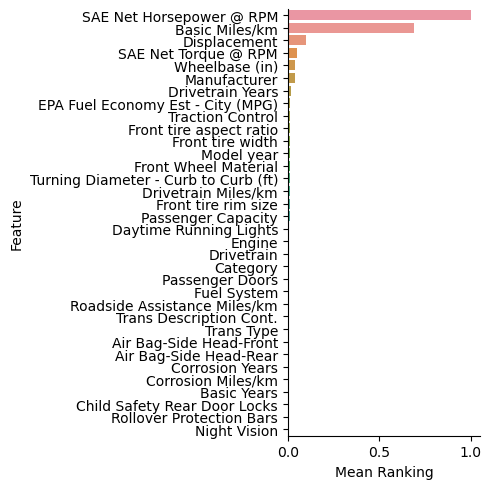

In [199]:
sns.catplot(x="Mean Ranking", y="Feature", kind="bar", data=meanplot)


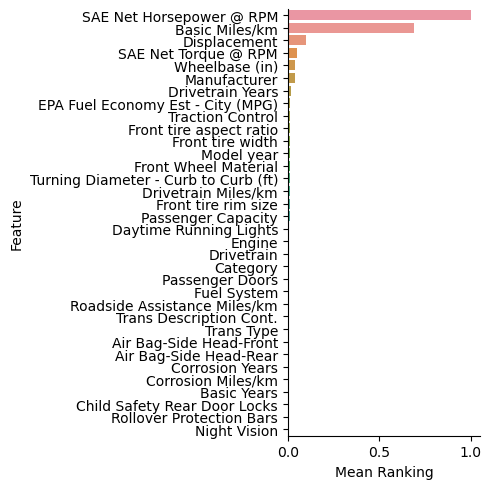

In [200]:
sns.catplot(x="Mean Ranking", y="Feature", kind="bar", data=meanplot)
